In [2]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
with open('../data/processed/polyga_clean_word_data.txt', 'r', encoding='utf-8') as f:
    words = f.read().split('\n')

In [4]:
word_forms_pattern = r'\(~(.*?)\)'

In [5]:
def extract_word_forms(word_record):
    word_forms_findings = re.findall(word_forms_pattern, word_record)
    flattened_forms_list = []
    for word_form in word_forms_findings:
        flattened_forms_list.extend(word_form.split(', ~'))
    word = word_record.split(' ')[0]
    return (word, flattened_forms_list)

In [6]:
words_with_forms = [extract_word_forms(word_record) for word_record in words]

In [7]:
morpheme_list = []
word_list = []

for word, forms in words_with_forms:
    word_list.append(word)
    morpheme_list.extend(word.split('/'))
    for form in forms:
        morpheme_list.extend(form.split('/'))

In [8]:
len(morpheme_list)

154869

In [9]:
morpheme_series = pd.Series(morpheme_list)

In [10]:
morphemes_val_count = morpheme_series.value_counts().reset_index()

In [11]:
len(morphemes_val_count)

7650

In [12]:
morphemes_val_count[:20]

,index,count
0,ти,13524
1,ий,11280
2,а,7592
3,н,6795
4,і,3562
5,ува,3498
6,я,3328
7,и,3272
8,у,2937
9,к,2586


# Analysis

In [13]:
words_df = pd.DataFrame({'raw_words': word_list})

In [14]:
words_df['morphemes'] = words_df['raw_words'].apply(lambda x: x.split('/'))
words_df['n_morphemes'] = words_df['morphemes'].apply(lambda x: len(x))
words_df['n_letters'] = words_df['raw_words'].apply(lambda x: len(x)) - words_df['n_morphemes'] + 1

words_df['letter_by_morphemes'] = words_df['n_letters']/words_df['n_morphemes']

In [15]:
morphemes = words_df['morphemes'].explode().reset_index(drop=True)

In [16]:
morphemes_val_count = morphemes.value_counts().reset_index()

In [17]:
print(f"Total words - {len(words_df)}")

Total words - 35444


In [18]:
print(f"Total morphemes - {len(morphemes)}")

Total morphemes - 133290


In [19]:
print(f"Avg morphemes per word - {words_df['n_morphemes'].mean()}")

Avg morphemes per word - 3.7605800699695293


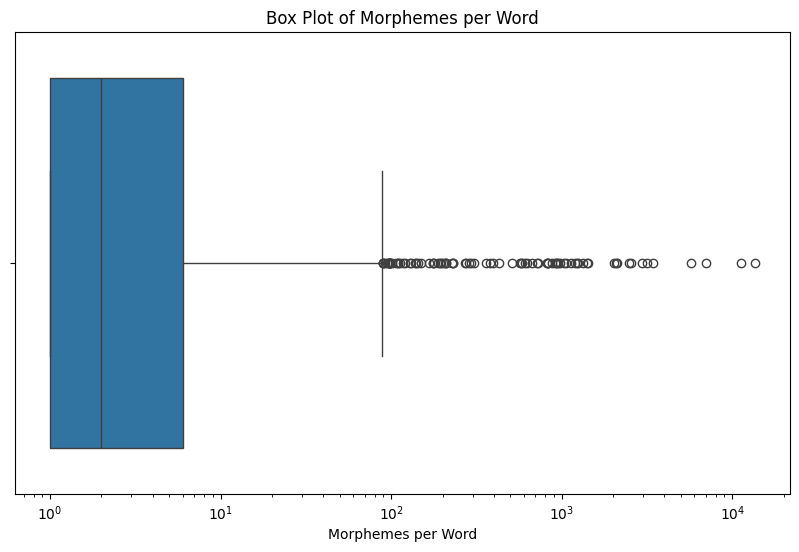

In [20]:
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x=morphemes_val_count['count'], log_scale=True)

# Labels and title
plt.xlabel("Morphemes per Word")
plt.title("Box Plot of Morphemes per Word")

plt.show()

### Number of morphemes

In [21]:
n_morphemes_value_counts = words_df['n_morphemes'].value_counts()

In [22]:
n_morphemes_value_counts.head()

n_morphemes
4    15290
3     9870
5     5956
2     2860
6      950
Name: count, dtype: int64

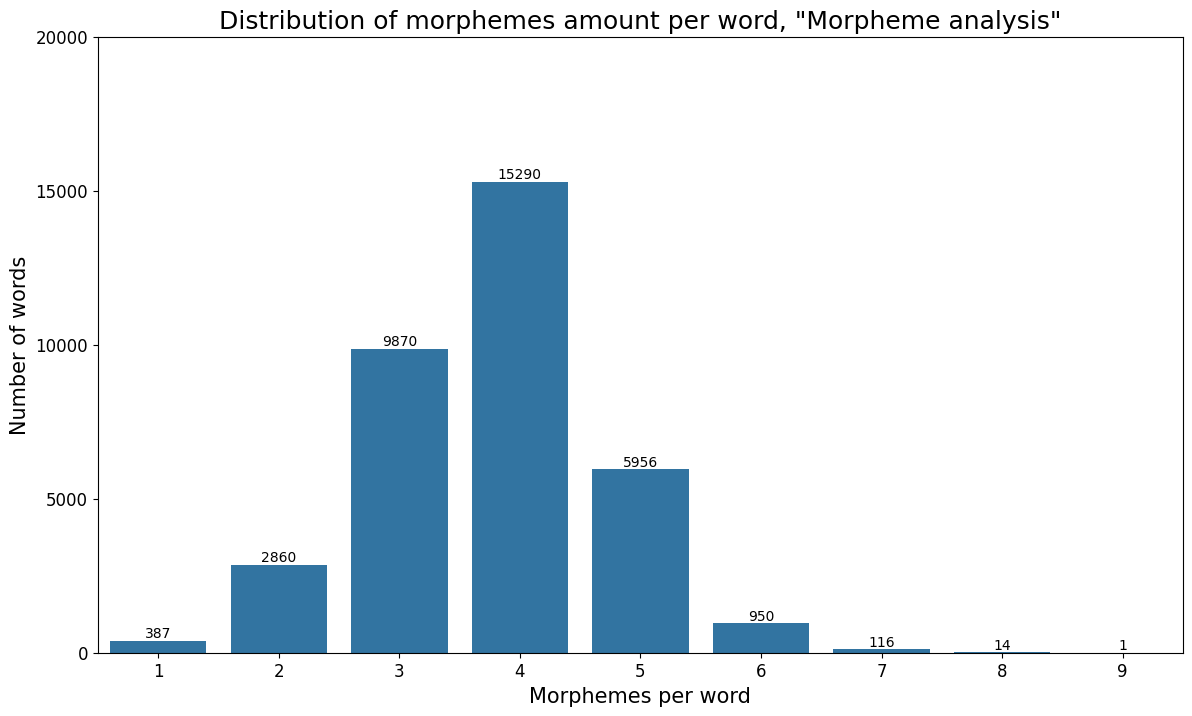

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart
sns.barplot(n_morphemes_value_counts, ax=ax)

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position
            p.get_height(),  # Y position
            int(p.get_height()),  # Text (count)
            ha='center', va='bottom', fontsize=10)  # Alignment

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# Labels and title
ax.set_xlabel("Morphemes per word", fontsize=15)
ax.set_ylabel("Number of words", fontsize=15)
ax.set_title("Distribution of morphemes amount per word, \"Morpheme analysis\"", fontsize=18)

# Set y-axis ticks
ax.set_yticks(np.arange(0, n_morphemes_value_counts.max() + 5000, 5000))

plt.show()

### WordCloud

In [63]:
text = ','.join(morphemes_val_count.loc[:50, 'morphemes'])
text

'ти,ий,а,н,ува,и,я,о,по,за,к,ен,ов,ви,на,роз,юва,пере,при,і,з,в,ся,не,у,с,від,до,про,під,об,ість,ну,нн,л,ва,ова,ин,ник,ськ,ок,ч,енн,лив,ик,т,льн,ист,ець,без,ниц'

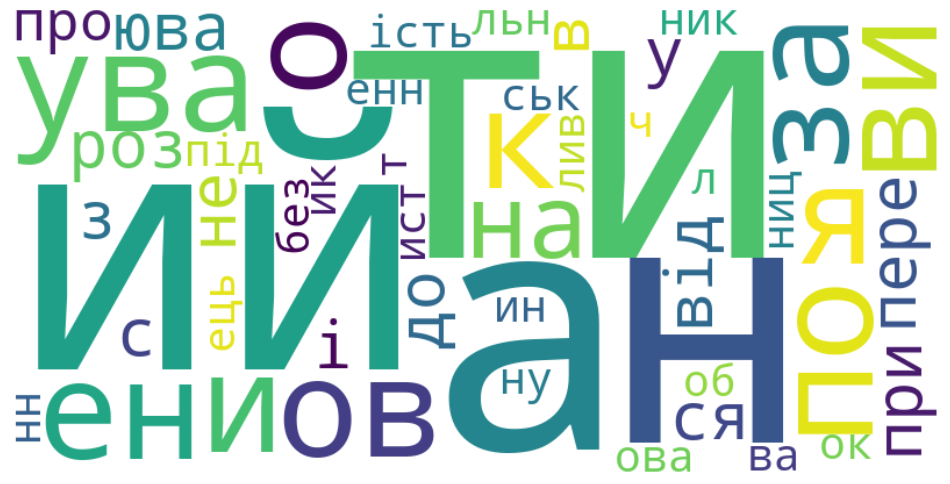

In [64]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()

## Save vocabulary

In [65]:
morphemes_val_count.to_csv('../data/vocabulary/polyga_vocabulary_with_counts.csv', index=False)